# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow_hub as hub
from functools import partial
import requests


2025-02-11 19:11:22.791389: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 19:11:22.853211: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 19:11:22.866232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 19:11:22.869898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 19:11:22.918548: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1739297513.441512    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739297513.537208    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739297513.537378    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

In [4]:
# Cargar datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Concatenar datos de entrenamiento y prueba
x_all = np.concatenate([x_train, x_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)


x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)  # (batch_size, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)

# Imprimir tamaños resultantes
print(f"Tamaño de x_train: {x_train.shape}")
print(f"Tamaño de x_test: {x_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de x_train: (60000, 28, 28, 1)
Tamaño de x_test: (10000, 28, 28, 1)
Tamaño de y_train: (60000, 10)
Tamaño de y_test: (10000,)


In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

I0000 00:00:1739297628.369191    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739297628.369411    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739297628.369521    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739297628.433681    5141 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=75, validation_split=0.1,callbacks=early_stopping_cb)

Epoch 1/75


I0000 00:00:1739294679.543455   13319 service.cc:146] XLA service 0x792df800de50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739294679.543484   13319 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-11 18:24:39.577649: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-11 18:24:39.698794: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


 110/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4551 - loss: 1.6485

I0000 00:00:1739294681.397893   13319 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8501 - loss: 0.4667 - val_accuracy: 0.9838 - val_loss: 0.0507
Epoch 2/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9731 - loss: 0.0938 - val_accuracy: 0.9868 - val_loss: 0.0401
Epoch 3/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9804 - loss: 0.0678 - val_accuracy: 0.9905 - val_loss: 0.0334
Epoch 4/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9913 - val_loss: 0.0307
Epoch 5/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0524 - val_accuracy: 0.9922 - val_loss: 0.0312
Epoch 6/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9910 - val_loss: 0.0311
Epoch 7/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9882 - loss: 0.0425 - val_accuracy: 0.9940 - val_loss: 0.0265
Epoch 8/75
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9888 - loss: 0.0365 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Etiqueta real: 9
Etiqueta predecida: 9


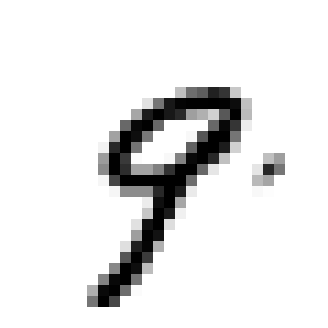

In [7]:
i = np.random.randint(1,len(x_test))
plt.figure(figsize=(4, 4))
plt.imshow(x_test[i],cmap='gray_r')
plt.axis("off")
pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
print(f"Etiqueta real: {y_test[i]}")
print(f"Etiqueta predecida: {np.argmax(pred)}")

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

In [8]:
resnet = tf.keras.applications.ResNet101V2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet101v2",
)


In [9]:
# URL para descargar las clases de ImageNet
url = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
response = requests.get(url)
class_idx = response.json()

# Mostrar algunas de las clases
for i in range(10):  # Imprimir las primeras 10 clases
    print(class_idx[str(i)][1])  # El segundo elemento es el nombre de la clase


tench
goldfish
great_white_shark
tiger_shark
hammerhead
electric_ray
stingray
cock
hen
ostrich


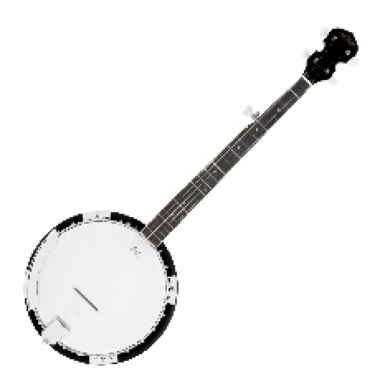

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted: [('n02787622', 'banjo', 0.9999883), ('n02708093', 'analog_clock', 1.1700009e-05), ('n04548280', 'wall_clock', 2.4953861e-08)]


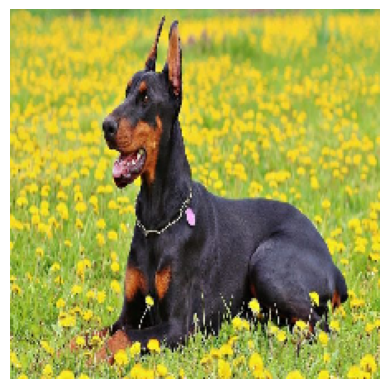

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n02107142', 'Doberman', 0.9998054), ('n02101006', 'Gordon_setter', 8.018085e-05), ('n02089078', 'black-and-tan_coonhound', 2.9779196e-05)]


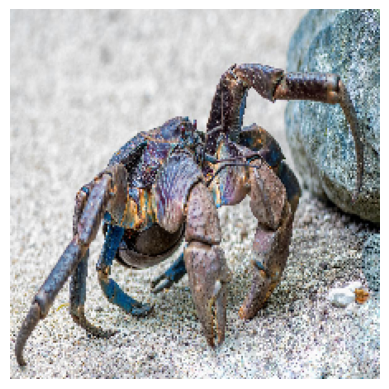

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: [('n01978455', 'rock_crab', 0.7725754), ('n01986214', 'hermit_crab', 0.13633047), ('n01980166', 'fiddler_crab', 0.08229338)]


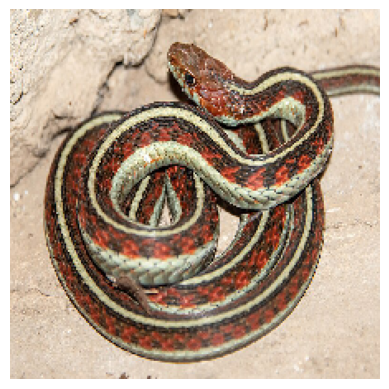

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n01735189', 'garter_snake', 0.9999999), ('n01756291', 'sidewinder', 7.5265014e-08), ('n01740131', 'night_snake', 2.7619935e-08)]


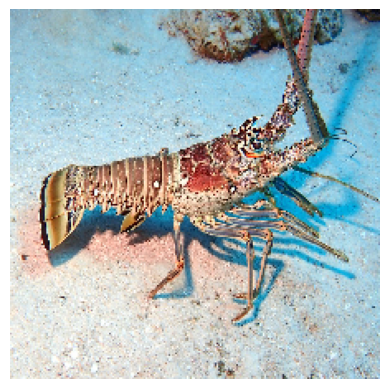

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n01984695', 'spiny_lobster', 0.9999988), ('n01985128', 'crayfish', 1.2001459e-06), ('n01983481', 'American_lobster', 1.30237465e-08)]


In [10]:
images=["banjo","Doberman","cangrejo_cocotero","garter_snake","spiny_lobster"]

for imag in images:
    resnetv2 = tf.keras.applications.ResNet101V2(weights='imagenet')
    img_path = f'./datos/imagenes/{imag}.jpg'
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet_v2.preprocess_input(x)

    preds = resnetv2.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', tf.keras.applications.resnet50.decode_predictions(preds, top=3)[0])



## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

In [6]:
# Cargar el conjunto de datos Food101 desde TFDS
data, info = tfds.load('food101', split=["validation[:50%]", "validation[50%:]", "train"], with_info=True, as_supervised=True)

# Separar por train val y test
test_set_raw = data[0]  # test[:50%]
valid_set_raw = data[1]  # test[50%:]
train_set_original_raw = data[2]  # train

# Sacar las clases
class_names = info.features['label'].names

imagenes de entrenamiento


2025-02-11 19:14:08.184499: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


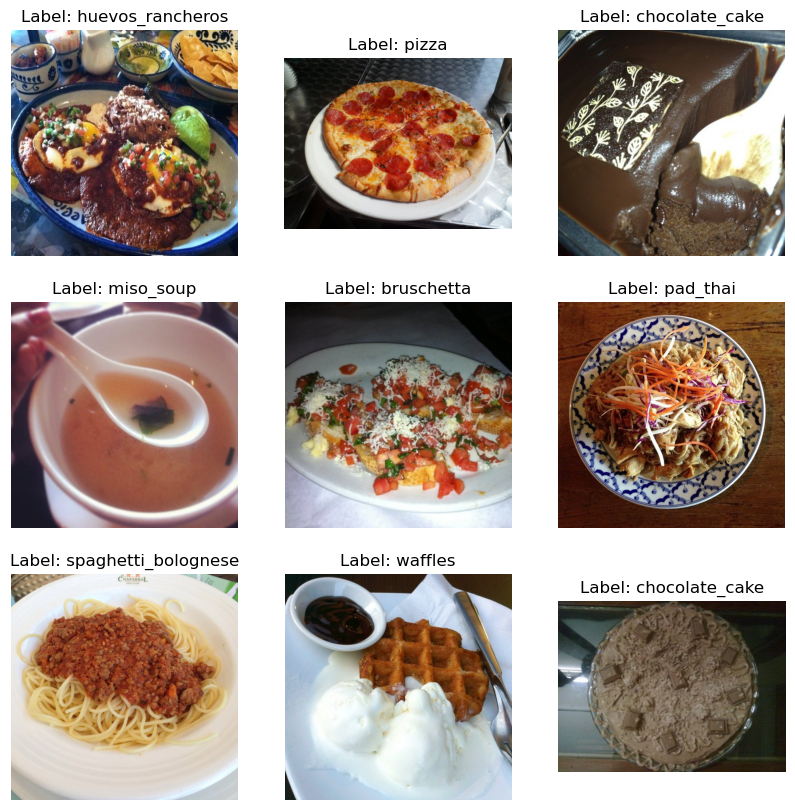

imagenes de validación


2025-02-11 19:14:08.573374: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


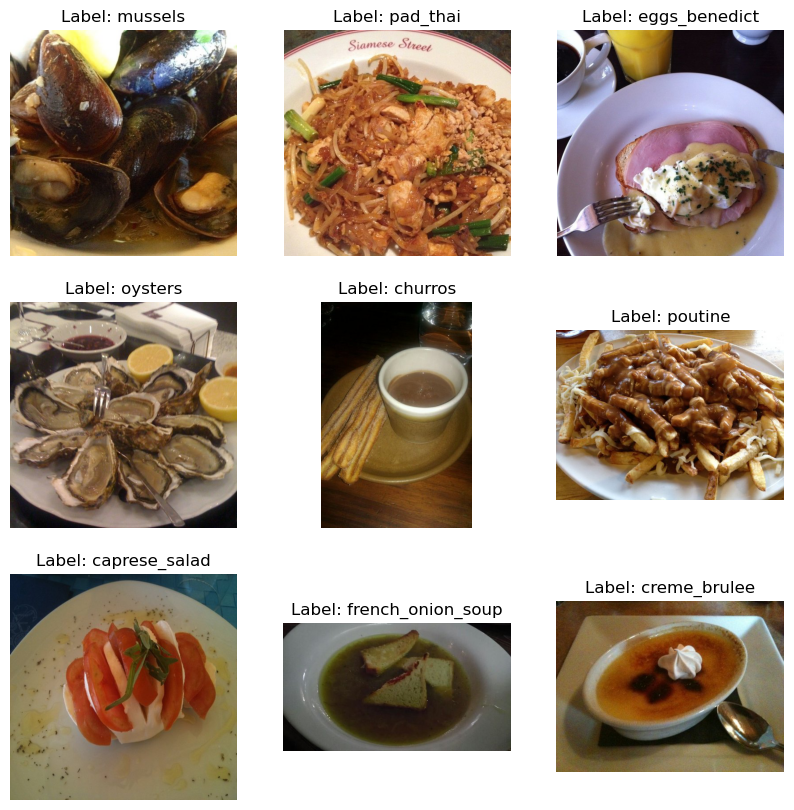

imagenes de prueba


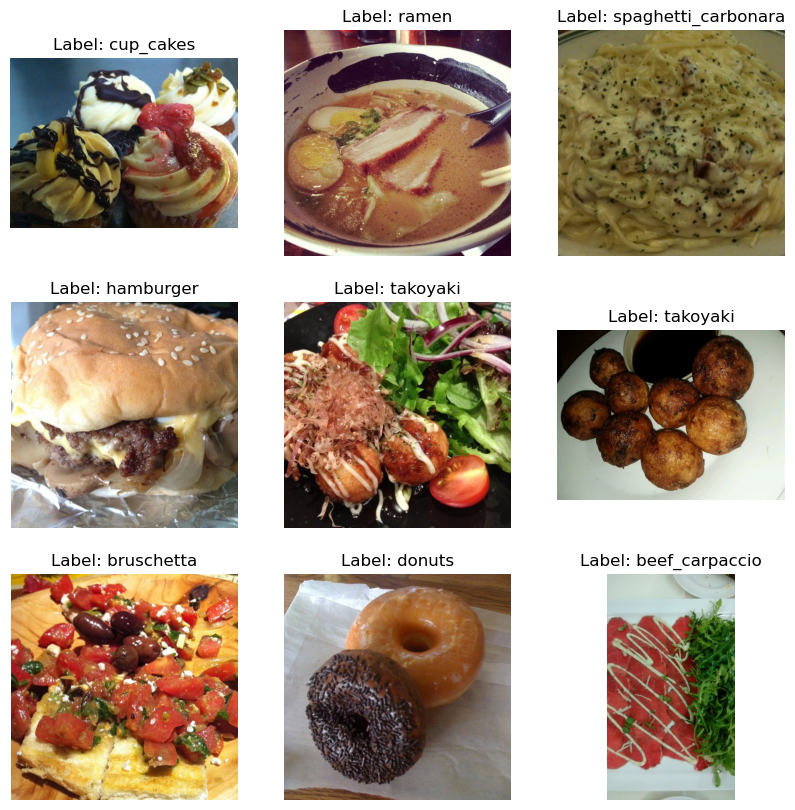

In [7]:
# Función para mostrar algunas imágenes
def plot_images(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {class_names[label.numpy()]}")
        plt.axis("off")
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
print("imagenes de entrenamiento")
plot_images(train_set_original_raw)

# Mostrar algunas imágenes del nuevo conjunto de validación
print("imagenes de validación")
plot_images(valid_set_raw)

# Mostrar algunas imágenes del nuevo conjunto de prueba
print("imagenes de prueba")
plot_images(test_set_raw)


In [8]:
# Tamaño de la imagen de entrada
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 5

# Aumento de datos
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),   # Volteo horizontal aleatorio
    tf.keras.layers.RandomRotation(0.2),  # Rotación aleatoria (20% en cada dirección)
    tf.keras.layers.RandomZoom(0.2),  # Zoom aleatorio (20%)
    tf.keras.layers.RandomContrast(0.2),  # Contraste aleatorio
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)  # Desplazamientos aleatorios
])

# Preprocesar las imágenes (redimensionar y normalizar)
def preprocess_image(image, label):
    # Redimensionar la imagen a IMG_SIZE x IMG_SIZE
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    # Normalizar la imagen (entre -1 y 1)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    # Aplicar aumento de datos
    image = data_augmentation(image)
    return image, label

# Aplicar el preprocesamiento y aumento de datos directamente
train_set = train_set_original_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE)

# Mezclar, agrupar en lotes y prefetch para mejorar el rendimiento
train_set = train_set.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Aplicar preprocesamiento y batching a los sets de validación y prueba
valid_set = valid_set_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_set = test_set_raw.map(lambda image, label: preprocess_image(image, label), num_parallel_calls=tf.data.AUTOTUNE)

In [9]:
# Crear el modelo con MobileNetV2 congelado en la primera fase de entrenamiento
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Congelar las capas del modelo base (MobileNetV2) al principio
base_model.trainable = False

# Construir el modelo
model = tf.keras.Sequential([
    base_model,         # MobileNetV2 sin capas superiores
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')  # Número de clases para Food101
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con las capas congeladas (solo la última capa entrenará)
model.fit(train_set, epochs=EPOCHS, validation_data=valid_set)

Epoch 1/5


I0000 00:00:1739297669.514393    5393 service.cc:146] XLA service 0x78d18000f510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739297669.514427    5393 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-11 19:14:29.592625: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-11 19:14:29.933644: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100
2025-02-11 19:14:30.273773: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 16 bytes spill stores, 16 bytes spill loads

2025-02-11 19:14:30.721515: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memo

   7/2368 ━━━━━━━━━━━━━━━━━━━━ 1:09 29ms/step - accuracy: 0.0029 - loss: 5.1211   

I0000 00:00:1739297674.045591    5393 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1760 - loss: 3.7535

2025-02-11 19:15:50.778010: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 116 bytes spill stores, 116 bytes spill loads

2025-02-11 19:15:50.789717: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 216 bytes spill stores, 216 bytes spill loads

2025-02-11 19:15:50.938726: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4043', 80 bytes spill stores, 80 bytes spill loads

2025-02-11 19:15:50.951318: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6268', 144 bytes spill stores, 144 bytes spill loads



2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1760 - loss: 3.7534

2025-02-11 19:16:07.064156: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 4 bytes spill stores, 4 bytes spill loads

2025-02-11 19:16:07.617786: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 64 bytes spill stores, 64 bytes spill loads

2025-02-11 19:16:07.654125: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1167', 324 bytes spill stores, 324 bytes spill loads



2368/2368 ━━━━━━━━━━━━━━━━━━━━ 103s 40ms/step - accuracy: 0.1760 - loss: 3.7532 - val_accuracy: 0.2958 - val_loss: 3.0320
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 107s 44ms/step - accuracy: 0.2834 - loss: 3.1348 - val_accuracy: 0.3192 - val_loss: 2.9554
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 107s 45ms/step - accuracy: 0.3012 - loss: 3.0516 - val_accuracy: 0.3142 - val_loss: 2.9469
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 108s 45ms/step - accuracy: 0.3143 - loss: 2.9919 - val_accuracy: 0.3248 - val_loss: 2.9001
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 106s 44ms/step - accuracy: 0.3181 - loss: 2.9595 - val_accuracy: 0.3237 - val_loss: 2.9147


In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
# Descongelar las capas del bloque 10 al 16 más las 2 de salida nuestras para fine tunning
for layer in model.layers[-24:]:  # 22 + 2 capas de salida
    if not isinstance(layer, tf.keras.layers.BatchNormalization):  # Evitar problemas con BN
        layer.trainable = True

# Volver a compilar el modelo para aplicar los cambios
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

# Entrenar nuevamente con todas las capas entrenables
model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2550 - loss: 3.3000

2025-02-11 19:28:53.263900: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 32 bytes spill stores, 32 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_and_reduce_fusion_1', 320 bytes spill stores, 320 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_and_reduce_fusion_2', 236 bytes spill stores, 244 bytes spill loads



2368/2368 ━━━━━━━━━━━━━━━━━━━━ 198s 73ms/step - accuracy: 0.2550 - loss: 3.2999 - val_accuracy: 0.3796 - val_loss: 2.5638
Epoch 2/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 173s 72ms/step - accuracy: 0.3759 - loss: 2.5905 - val_accuracy: 0.4321 - val_loss: 2.3025
Epoch 3/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 169s 71ms/step - accuracy: 0.4169 - loss: 2.3997 - val_accuracy: 0.4661 - val_loss: 2.1400
Epoch 4/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 173s 73ms/step - accuracy: 0.4429 - loss: 2.2736 - val_accuracy: 0.4864 - val_loss: 2.0365
Epoch 5/5
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 176s 74ms/step - accuracy: 0.4618 - loss: 2.1767 - val_accuracy: 0.5036 - val_loss: 1.9639


In [14]:
!ls

 4_3Ejercicios.ipynb		   Problemas.ipynb
 4_6Ejercicios.ipynb		   __pycache__
 4_7Ejercicios.ipynb		   recursos
 5_3Ejercicios.ipynb		   Resultados
'5_5Ejercicios - Solucion.ipynb'   resultados4_3
 5_5Ejercicios_Elena.ipynb	   resultados4_7
 5_5Ejercicios.ipynb		   runs
 datos				   tracked_objects_2025-02-10.csv
 esquema_modelo_funcional.png


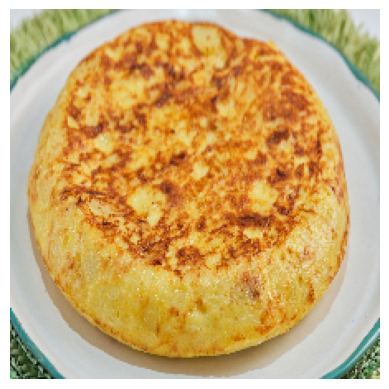

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicción de clase: spaghetti_bolognese


In [15]:
# Ruta de la imagen
img_path = 'datos/imagenes/tortilla.jpeg'

# Cargar la imagen
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))  # Redimensionar la imagen

# Convertir la imagen a un arreglo numpy
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Expande las dimensiones para que coincida con el formato (batch_size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Normalizar la imagen
img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

# Mostrar la imagen para verificar
plt.imshow(img)
plt.axis('off')
plt.show()

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase con la mayor probabilidad
predicted_class = np.argmax(predictions, axis=1)

# Mapeo de índices a etiquetas
labels = info.features['label'].int2str

# Decodificar la clase en etiqueta
predicted_label = labels(predicted_class[0])

# Imprimir la clase predicha
print(f"Predicción de clase: {predicted_label}")

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)